In [4]:
import pprint
import numpy as np
import seaborn as sns

from source.utils import Utils
from source.pipeline import HsiPipeline
from source.hsiroutine import HsiRoutine
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
folder = '/media/koda/New Disk/Code/bacteria/atccs/gram_staining'
samples_dict = Utils.get_dict(samples=Utils.load_samples(folder))

pprint.pprint(samples_dict)

{'Bacillusscereus_14579_Plastico_B_180926-092335': [1],
 'Bacillussubtilis_6633_Plastico_B_180926-092656': [2],
 'Coryniumbacteriumglutaminum_13032_Plastico_B_180926-093210': [3],
 'Enterobacteaerogenes_13048_Plastico_B_Contaminado_180926-102747': [4],
 'Enterobactercloacal_HMFFTA_Plastico_B_180926-103027': [5],
 'Enterococcusfaecalis_29212_Plastico_B_180926-093958': [6],
 'Escherichiacoli_25922_Plastico_B_180926-102054': [7],
 'Klebsielapneumonial_700603_Plastico_B_180926-105913': [8],
 'Micrococcusluteus_9341_Plastico_B_180926-093534': [9],
 'Proteusmirabilis_9433_Plastico_B_180926-103336': [10],
 'Pseudomonasaeoruginosas_9027_Plastico_B_180926-104046': [11],
 'Salmonellaspp_10708_Plastico_B_180926-104803': [12],
 'Serratiamarcences_14765_Plastico_B_180926-105123': [13],
 'Staphylococcusaureus_25923_Plastico_B_Contaminado_180926-101712': [14],
 'Staphylococcusaureus_6538_Plastico_B_180926-101357': [15],
 'Staphylococcusepidemides_12228_Plastico_B_180926-094826': [16]}


In [3]:
samples_dict = {'Bacillusscereus_14579_Plastico_B_180926-092335': [1, 1],
 'Bacillussubtilis_6633_Plastico_B_180926-092656': [2, 1],
 'Coryniumbacteriumglutaminum_13032_Plastico_B_180926-093210': [3, 1],
 'Enterobacteaerogenes_13048_Plastico_B_Contaminado_180926-102747': [4, 2],
 'Enterobactercloacal_HMFFTA_Plastico_B_180926-103027': [5, 2],
 'Enterococcusfaecalis_29212_Plastico_B_180926-093958': [6, 1],
 'Escherichiacoli_25922_Plastico_B_180926-102054': [7, 2],
 'Klebsielapneumonial_700603_Plastico_B_180926-105913': [8, 2],
 'Micrococcusluteus_9341_Plastico_B_180926-093534': [9, 1],
 'Proteusmirabilis_9433_Plastico_B_180926-103336': [10, 2],
 'Pseudomonasaeoruginosas_9027_Plastico_B_180926-104046': [11, 2],
 'Salmonellaspp_10708_Plastico_B_180926-104803': [12, 2],
 'Serratiamarcences_14765_Plastico_B_180926-105123': [13, 2],
 'Staphylococcusaureus_25923_Plastico_B_Contaminado_180926-101712': [14, 1],
 'Staphylococcusaureus_6538_Plastico_B_180926-101357': [15, 1],
 'Staphylococcusepidemides_12228_Plastico_B_180926-094826': [16, 1]}

In [4]:
true_labels = {'gram_positiva': 1, 'gram_negativa': 2}
pipeline = HsiPipeline(data_folder=folder, samples=samples_dict)

In [ ]:
# pipeline.folder
# pipeline.samples

In [5]:
pca_matrix, var_exp, target_groups = pipeline.get_pca_matrix(case=1, 
                                                             true_labels=true_labels, 
                                                             mean=True)

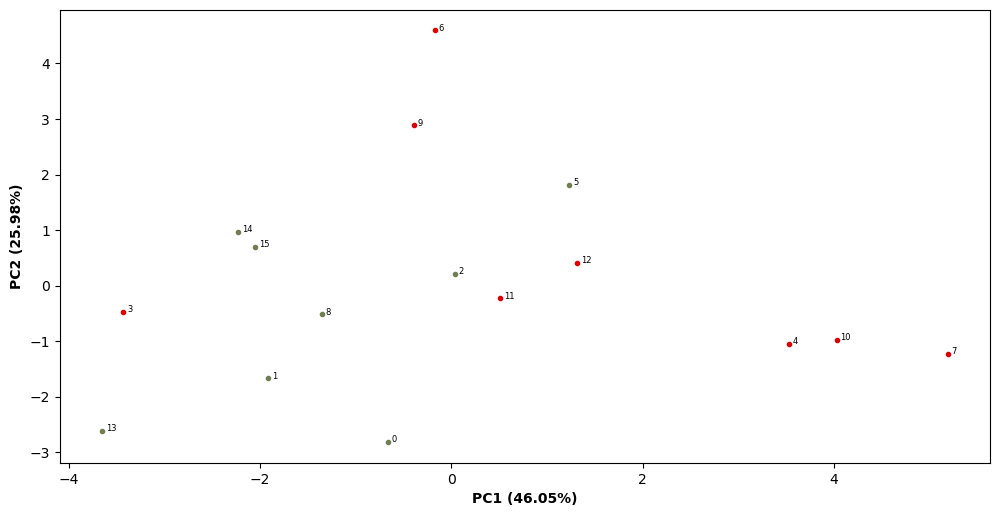

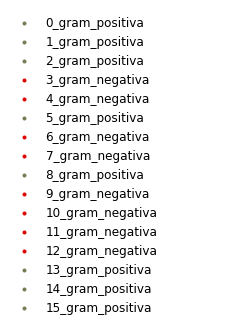

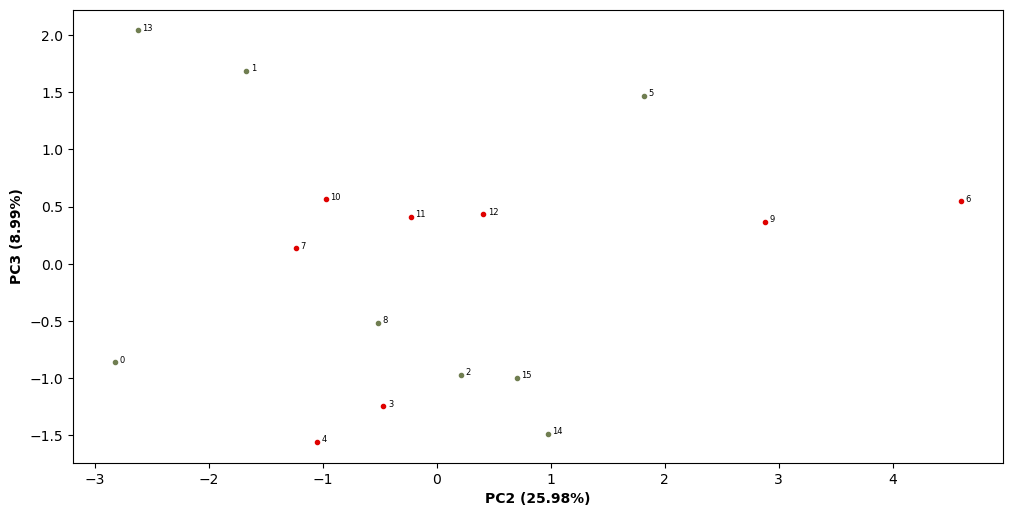

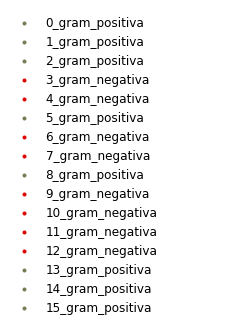

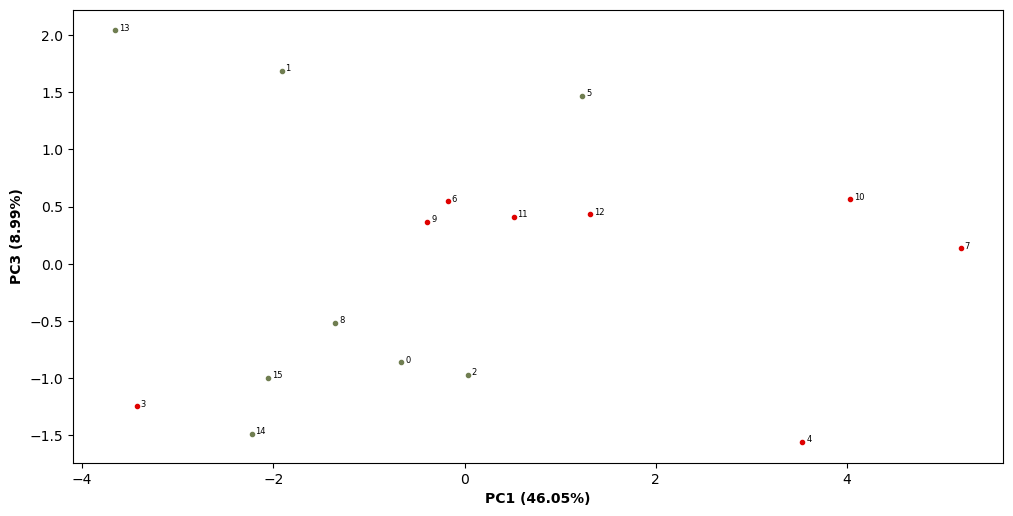

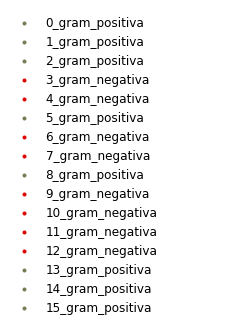

In [6]:
pipeline.plot_pca_samples(pca_matrix_groups=pca_matrix, 
                          exp_var_groups=var_exp, 
                          true_labels=target_groups, 
                          out_dir='figures_plot')

In [15]:
mean_group_gram,target = pipeline.get_group_mean_matrix(case=0, true_labels=true_labels)

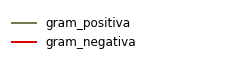

In [13]:
pipeline.plot_spectres(mean_group=mean_group_gram, 
                       true_labels=target, 
                       out_dir='figures_plot',
                       file_name='mean_spectres.jpeg')

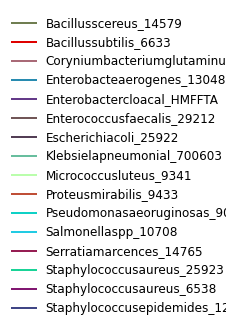

In [16]:
pipeline.plot_spectres(mean_group=mean_group_gram, 
                       true_labels=target, 
                       out_dir='figures_plot',
                       file_name='sample_spectres.jpeg')

In [5]:
# pipeline.process_images()

In [6]:
# pipeline.visualize_images()

In [17]:

pipeline = HsiPipeline(data_folder=folder, samples=samples_dict)
X_train, X_test, y_train, y_test, target_names = pipeline.get_Xy(case=1, 
                                                                 spectral_range=(1, 241), 
                                                                 true_labels=true_labels)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(483574, 240) (483580, 240)
(483574,) (483580,)


In [18]:
pprint.pprint(target_names)

[('Bacillusscereus_14579_Plastico_B_180926-092335', 'gram_positiva'),
 ('Bacillussubtilis_6633_Plastico_B_180926-092656', 'gram_positiva'),
 ('Coryniumbacteriumglutaminum_13032_Plastico_B_180926-093210',
  'gram_positiva'),
 ('Enterobacteaerogenes_13048_Plastico_B_Contaminado_180926-102747',
  'gram_negativa'),
 ('Enterobactercloacal_HMFFTA_Plastico_B_180926-103027', 'gram_negativa'),
 ('Enterococcusfaecalis_29212_Plastico_B_180926-093958', 'gram_positiva'),
 ('Escherichiacoli_25922_Plastico_B_180926-102054', 'gram_negativa'),
 ('Klebsielapneumonial_700603_Plastico_B_180926-105913', 'gram_negativa'),
 ('Micrococcusluteus_9341_Plastico_B_180926-093534', 'gram_positiva'),
 ('Proteusmirabilis_9433_Plastico_B_180926-103336', 'gram_negativa'),
 ('Pseudomonasaeoruginosas_9027_Plastico_B_180926-104046', 'gram_negativa'),
 ('Salmonellaspp_10708_Plastico_B_180926-104803', 'gram_negativa'),
 ('Serratiamarcences_14765_Plastico_B_180926-105123', 'gram_negativa'),
 ('Staphylococcusaureus_25923_Plas

In [19]:
models_file = 'gram_staining.joblib'
print(models_file)

gram_staining.joblib


In [20]:
from sklearn import (
    tree,
    naive_bayes,
    ensemble, 
    neighbors,
    svm,
    discriminant_analysis,
    linear_model, 
    neural_network
)

seed = 42
models =[
    tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, 
                                min_samples_split=2, min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, max_features=None, 
                                max_leaf_nodes=None, random_state=seed, 
                                min_impurity_decrease=0.0, min_impurity_split=None, 
                                class_weight=None, ccp_alpha=0.0),
    naive_bayes.GaussianNB(priors=None, var_smoothing=1e-09),
    ensemble.RandomForestClassifier(n_estimators=60, 
                                    bootstrap=True, oob_score=False, n_jobs=None, 
                                    random_state=seed, verbose=0, warm_start=False, 
                                    class_weight=None, max_samples=None, 
                                    criterion='gini', max_depth=None, 
                                    min_samples_split=2, min_samples_leaf=1, 
                                    min_weight_fraction_leaf=0.0, max_features='auto', 
                                    max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                    min_impurity_split=None, ccp_alpha=0.0),
    svm.SVC(decision_function_shape='ovr', break_ties=False, kernel='rbf', degree=3, 
            gamma='scale', coef0=0.0, tol=0.001, C=1.0, shrinking=True, probability=False, 
            cache_size=200, class_weight=None, verbose=False, max_iter=-1, random_state=seed),
    svm.SVC(decision_function_shape='ovr', break_ties=False, kernel='linear', degree=3, 
            gamma='scale', coef0=0.0, tol=0.001, C=1.0, shrinking=True, probability=False, 
            cache_size=200, class_weight=None, verbose=False, max_iter=-1, random_state=seed),
    svm.SVC(decision_function_shape='ovr', break_ties=False, kernel='poly', degree=3, 
            gamma='scale', coef0=0.0, tol=0.001, C=1.0, shrinking=True, probability=False, 
            cache_size=200, class_weight=None, verbose=False, max_iter=-1, random_state=seed),
    discriminant_analysis.LinearDiscriminantAnalysis(covariance_estimator=None, 
                                                     n_components=None,
                                                     priors=None, shrinkage=None, 
                                                     solver='svd',store_covariance=False,
                                                     tol=0.0001),
    discriminant_analysis.QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, 
                                                        store_covariance=False, 
                                                        tol=0.0001),
    linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0,
                                    fit_intercept=True, intercept_scaling=1, 
                                    class_weight=None, random_state=seed, 
                                    solver='lbfgs', max_iter=100, multi_class='auto',
                                    verbose=0, warm_start=False, n_jobs=None, 
                                    l1_ratio=None),
    ]

for model in models:
    print(model.__class__)

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
<class 'sklearn.naive_bayes.GaussianNB'>
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
<class 'sklearn.svm._classes.SVC'>
<class 'sklearn.svm._classes.SVC'>
<class 'sklearn.svm._classes.SVC'>
<class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>
<class 'sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis'>
<class 'sklearn.linear_model._logistic.LogisticRegression'>


In [ ]:
out_dir = 'output_gram_staining'
pipeline.train_models(x_train=X_train, 
                      x_test=X_test, 
                      y_train=y_train, 
                      y_test=y_test, 
                      models=models,
                      samples_dict=samples_dict,
                      target_names=target_names,
                      models_file=models_file,
                      work_dir=out_dir)

DecisionTreeClassifier
